In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import scanpy as sc
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (17,17)
# import muon as mu
# Import a module with ATAC-seq-related functions
# from muon import atac as ac
sc.settings.verbosity =0

In [4]:
palette_ = { 'PT':'#ff9896',
 'PT_VCAM1':'#c5b0d5',
 'TL':'#279e68',
 'TAL':'#c49c94',
 'DCT1':'#ff7f0e',
 'CNT':'#1f77b4',
 'PC':'#aec7e8',
 'ENDO':'#d62728',
 'MES':'#17becf',
 'FIB':'#aa40fc',
 'ICA':'#8c564b',
 'ICB':'#e377c2',
 'PODO':'#98df8a',
 'PEC':'#ffbb78',
 'LEUK':'#b5bd61',
          }


In [31]:
palette = {'CNT':'#1f77b4',
 'DCT1':'#ff7f0e',
 'DCT2':'#279e68',
 'TL':'#279e68',
 'DCT':'#ff7f0e',
 'ENDO':'#d62728',
 'FIB':'#aa40fc',
 'ICA':'#8c564b',
 'ICB':'#e377c2',
 'LEUK':'#b5bd61',
 'MES_FIB':'#17becf',
 'MES':'#17becf',
 'VSM':'#f7b6d2',
 'PC':'#aec7e8',
 'PEC':'#ffbb78',
 'PODO':'#98df8a',
 'PT':'#ff9896',
 'PT_VCAM1':'#c5b0d5',
 'TAL':'#c49c94',
 'aPT':'#c5b0d5',
 'Unclassified':'#808080',
 'Unknown':'#000000',
 'Low_Quality_RNA':'#808080'}

# LOAD DATA TO INTEGRATE

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import anndata as an
# from scvi.external import CellAssign

/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be r

In [ ]:
adata = sc.read('results_multiVI/multiVI_Cortex.h5ad')

In [5]:
adata.obs['batch'].value_counts()

snRNA      94493
scRNA      48366
scRNA5p    12797
Name: batch, dtype: int64

In [7]:
adata.obs['sample_original'] = adata.obs['sample'].copy()

In [ ]:
# Ensure Accessiblity cells from MEDULA area are removed
adata = adata[~(adata.obs['sample_original'].isin(['lib_23','lib_38']) & adata.obs['modality'].isin(['accessibility']))].copy()

In [11]:
adata.obs['sample'] = adata.obs['sample'].tolist()

In [12]:
mvi = scvi.model.MULTIVI.load("results_multiVI/model_cortex", adata=adata,)

INFO     File results_multiVI/model_cortex/model.pt already downloaded                                             


/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [14]:
adata.obsm["MultiVI_latent"] = mvi.get_latent_representation()

In [29]:
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (17,17)

In [15]:
adata.write('results_multiVI/multiVI_Cortex_Final.h5ad', compression='gzip')

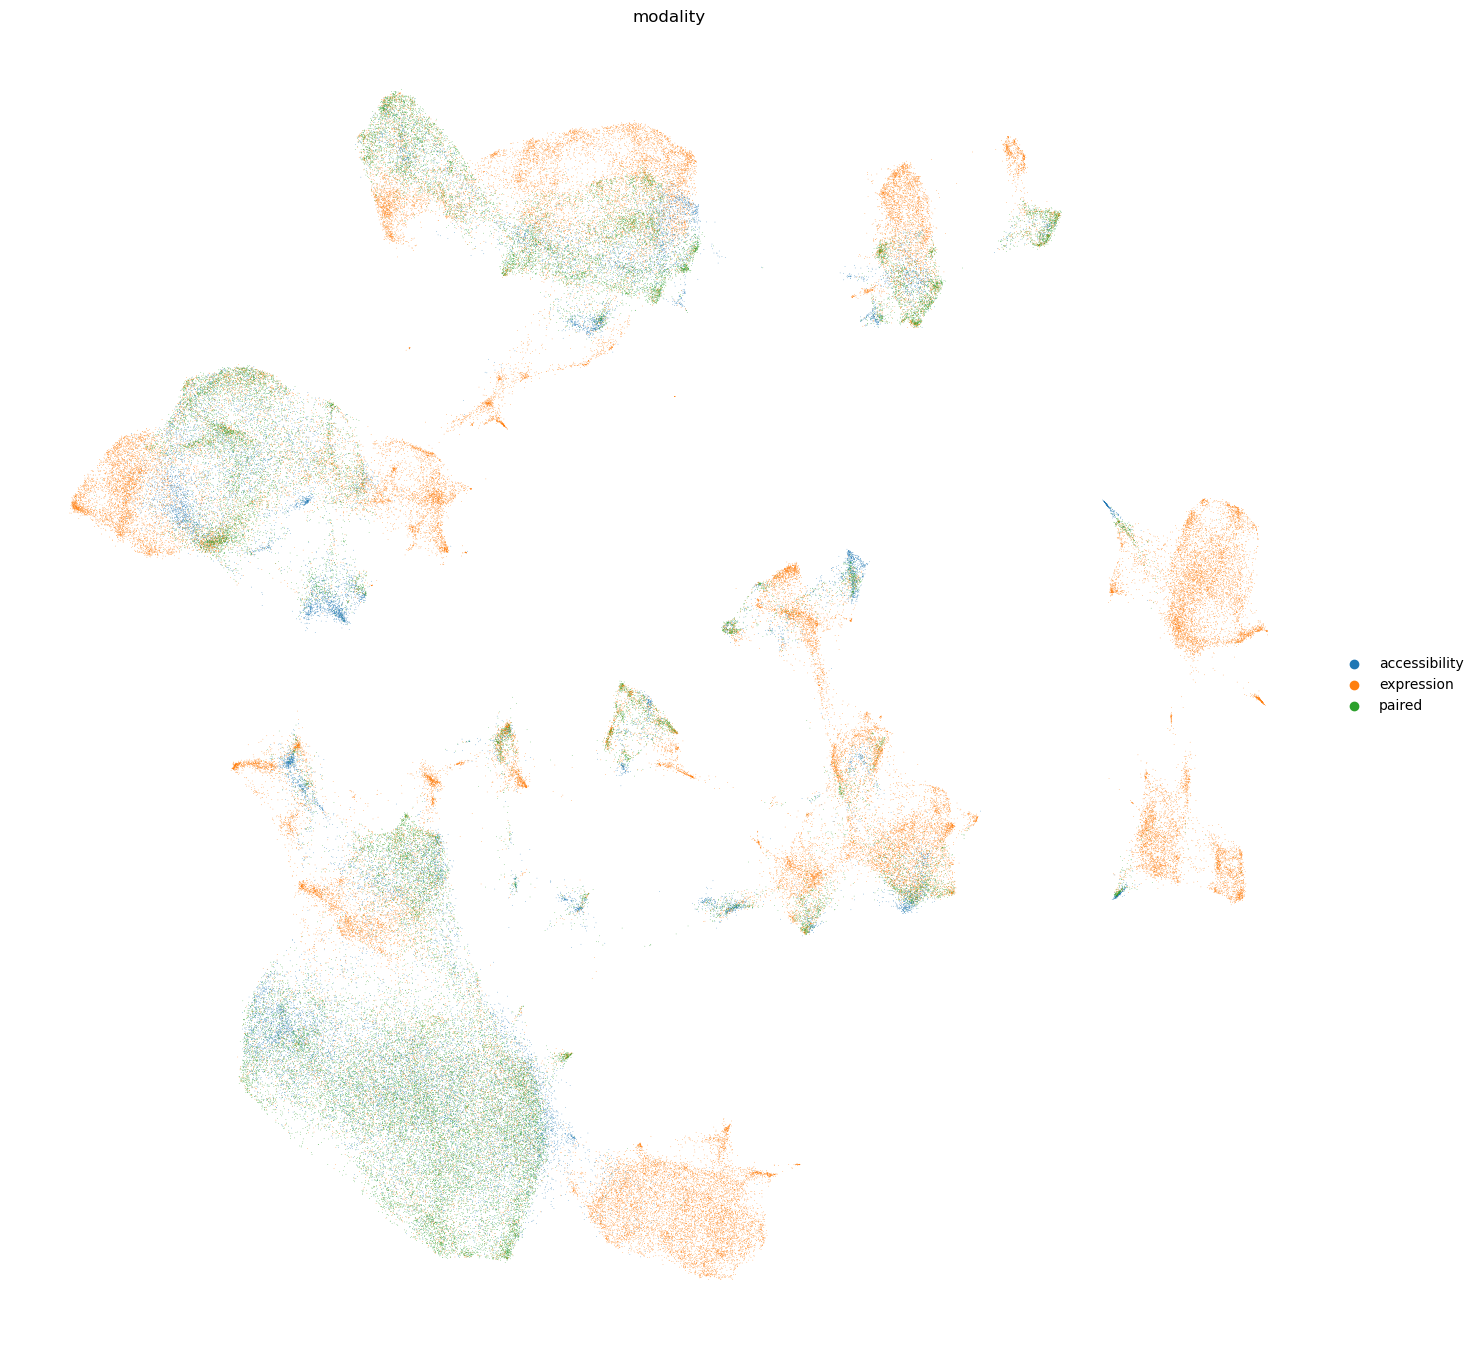

In [ ]:
sc.pp.neighbors(adata, use_rep="MultiVI_latent")
sc.tl.umap(adata, spread = 1.5, min_dist=0.1)
sc.pl.umap(adata, color="modality", frameon=False, save='Modality.png')

In [ ]:
sc.tl.leiden(adata, resolution=1.2)

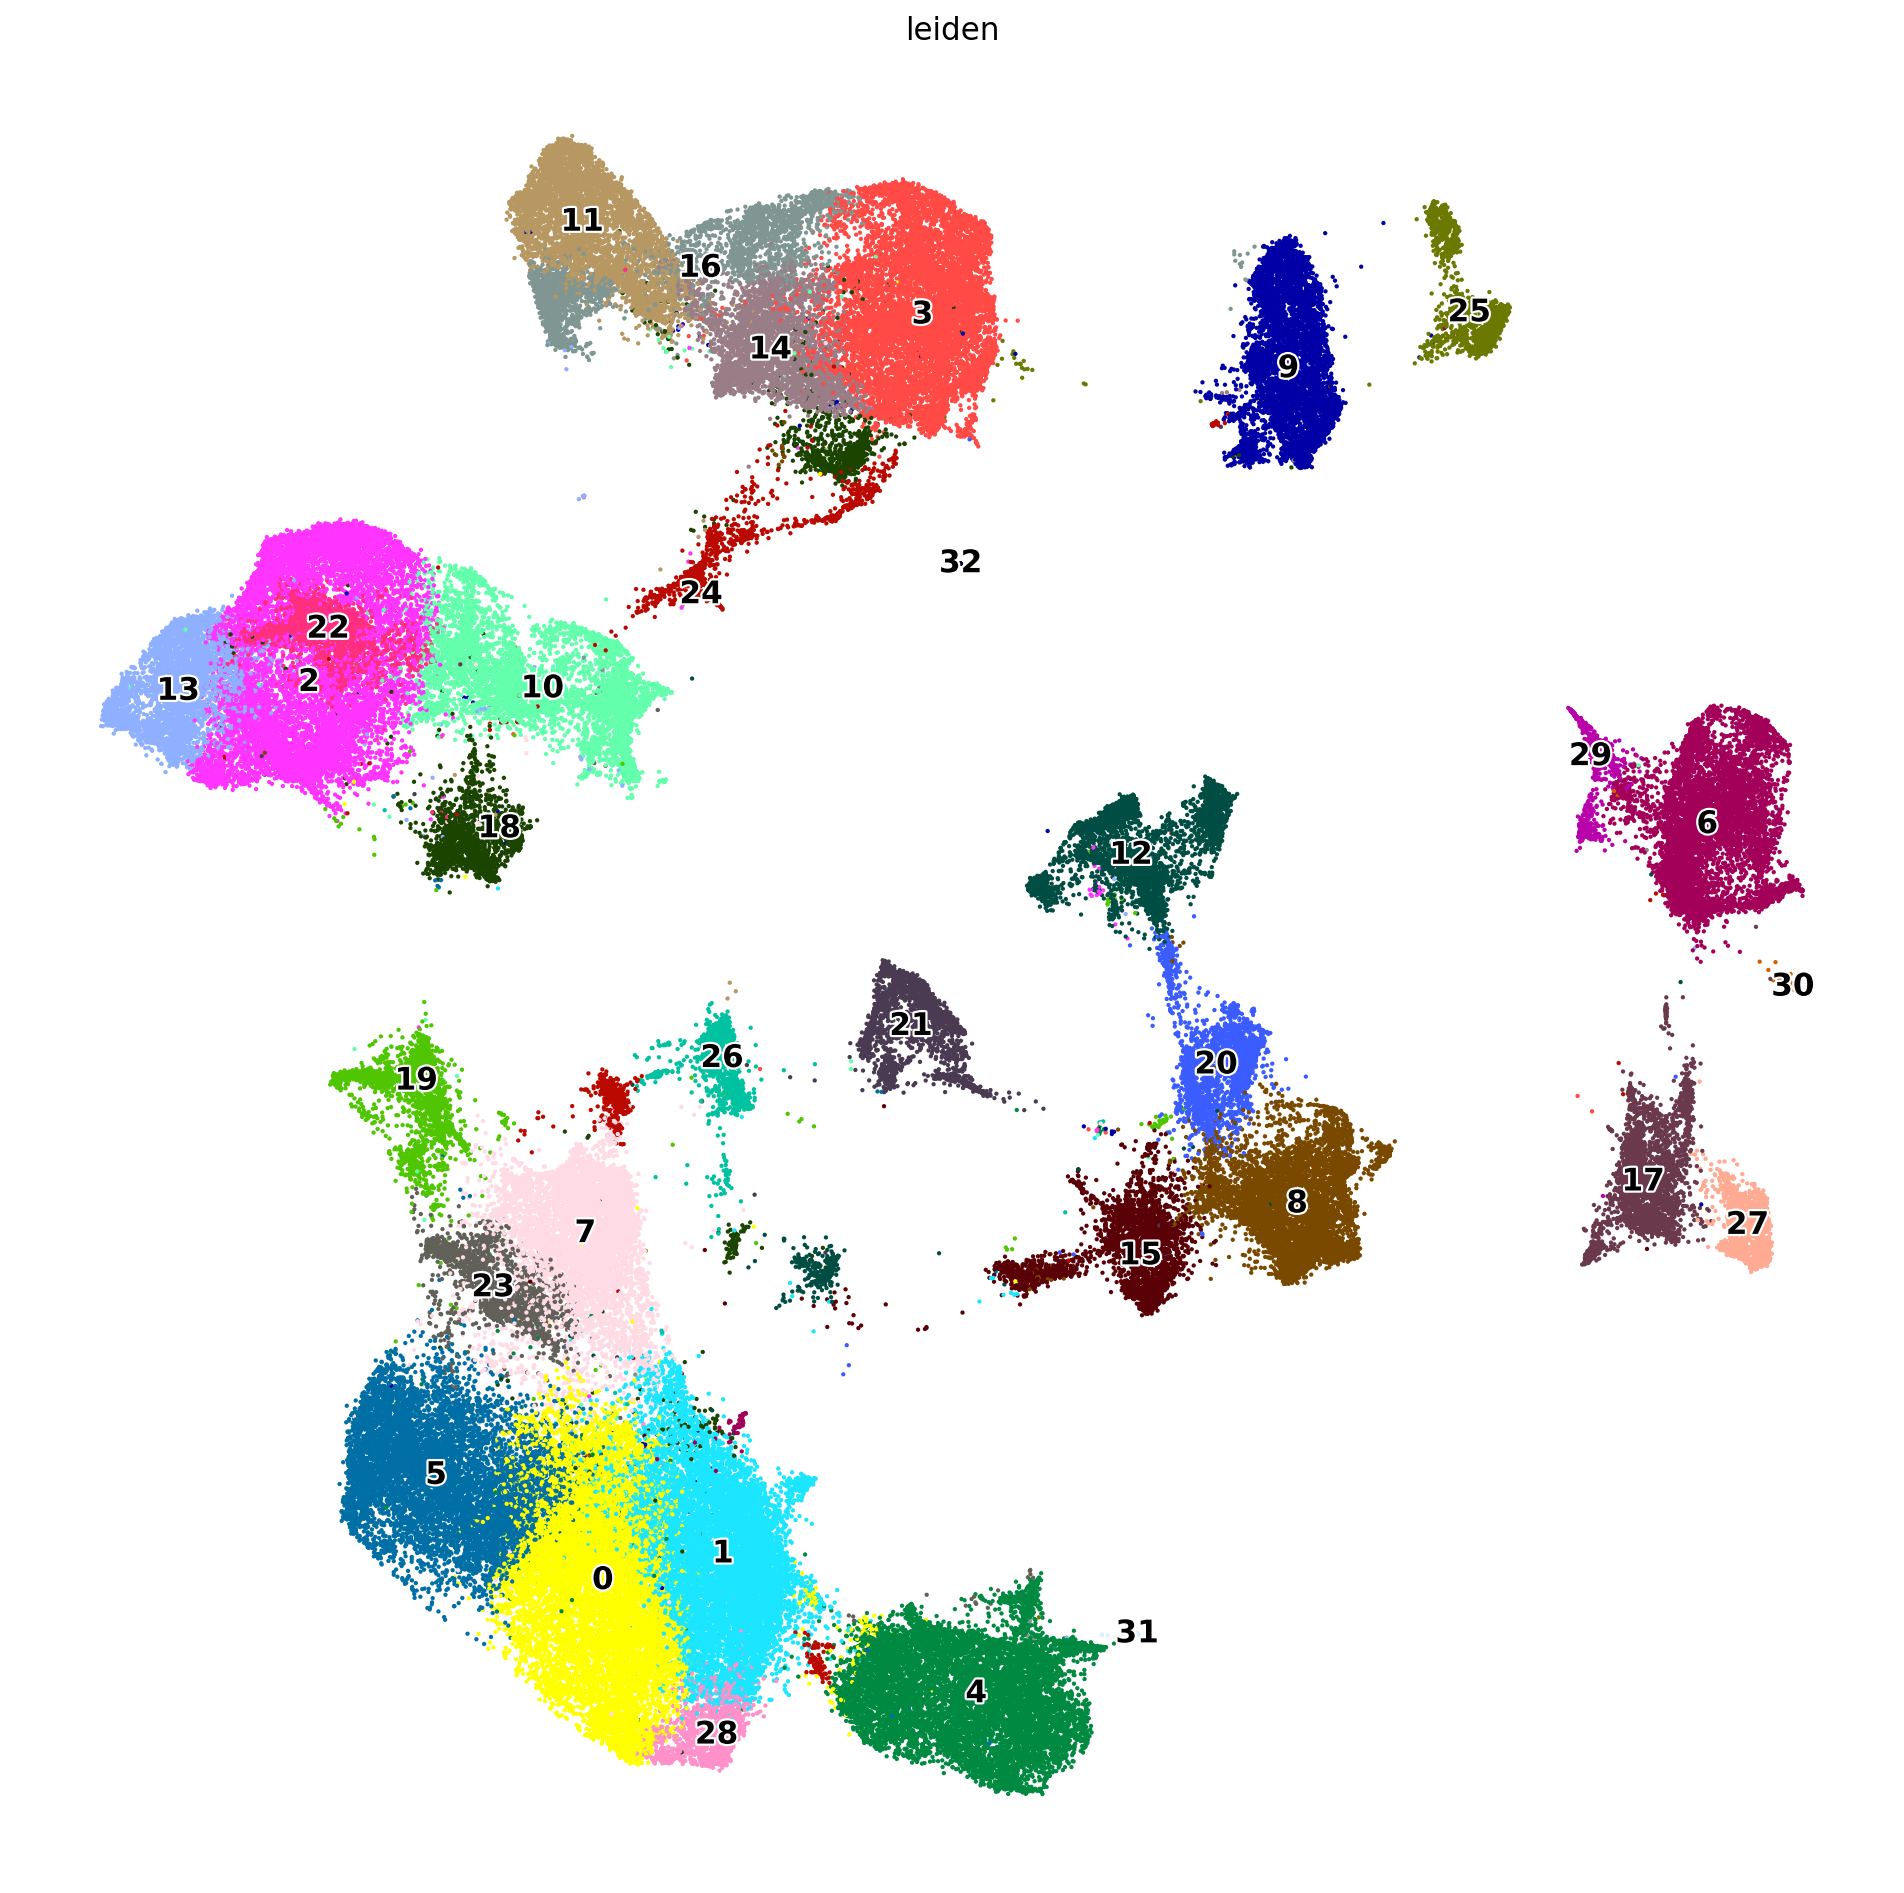

In [ ]:
sc.settings.set_figure_params(figsize=('15', '15'), color_map='magma')
sc.pl.umap(adata, color = ['leiden'], frameon=False, legend_loc='on data', size = 15, vmax='p99', legend_fontoutline=2)

# For the sake of the downstream analysis we will perform a FINAL CLUSTER BASED FILTERING using RNA INFORMATION to filter out inconsistant signals that can induce confounding factors

In [ ]:
adata = adata[:,adata.var['modality'].isin(['Gene Expression']).tolist()].copy()

In [ ]:
sc.pp.filter_cells(adata, min_counts=1)
adata

AnnData object with n_obs × n_vars = 113294 × 15576
    obs: 'sample', 'batch', 'modality', 'Annotation_bySample', 'bySample_leiden_Celltype', 'kidney_area', '_indices', '_scvi_batch', '_scvi_labels', 'leiden', 'Deepscore_external', 'concat_batch', 'sample_original', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'formated_index', 'xtra', 'Imputed_Deepscore_external', 'Imputed_Deepscore_external_score'
    var: 'highly_variable', 'n_cells', 'modality'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'modality_colors', 'neighbors', 'umap', 'Imputed_Deepscore_external_colors', 'leiden', 'leiden_colors', 'batch_colors', 'sample_colors'
    obsm: 'MultiVI_latent', 'X_hvp_lsi_harmonized', 'X_lsi', 'X_lsi_harmonized', 'X_pca', 'X_umap', 'X_umap_harmonized', 'X_umap_hvp_harmonized', '_scvi_extra_categorical_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata

AnnData object with n_obs × n_vars = 113294 × 15576
    obs: 'sample', 'batch', 'modality', 'Annotation_bySample', 'bySample_leiden_Celltype', 'kidney_area', '_indices', '_scvi_batch', '_scvi_labels', 'leiden', 'Deepscore_external', 'concat_batch', 'sample_original', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'formated_index', 'xtra', 'Imputed_Deepscore_external', 'Imputed_Deepscore_external_score'
    var: 'highly_variable', 'n_cells', 'modality'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'modality_colors', 'neighbors', 'umap', 'Imputed_Deepscore_external_colors', 'leiden', 'leiden_colors', 'batch_colors', 'sample_colors'
    obsm: 'MultiVI_latent', 'X_hvp_lsi_harmonized', 'X_lsi', 'X_lsi_harmonized', 'X_pca', 'X_umap', 'X_umap_harmonized', 'X_umap_hvp_harmonized', '_scvi_extra_categorical_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata.X.data

array([ 2.,  2.,  2., ..., 17.,  4., 38.])

In [ ]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [ ]:
sc.tl.rank_genes_groups(adata,groupby='leiden', method='wilcoxon', use_raw = False )

In [ ]:
sc.tl.dendrogram(adata, use_rep='MultiVI_latent', groupby='leiden')

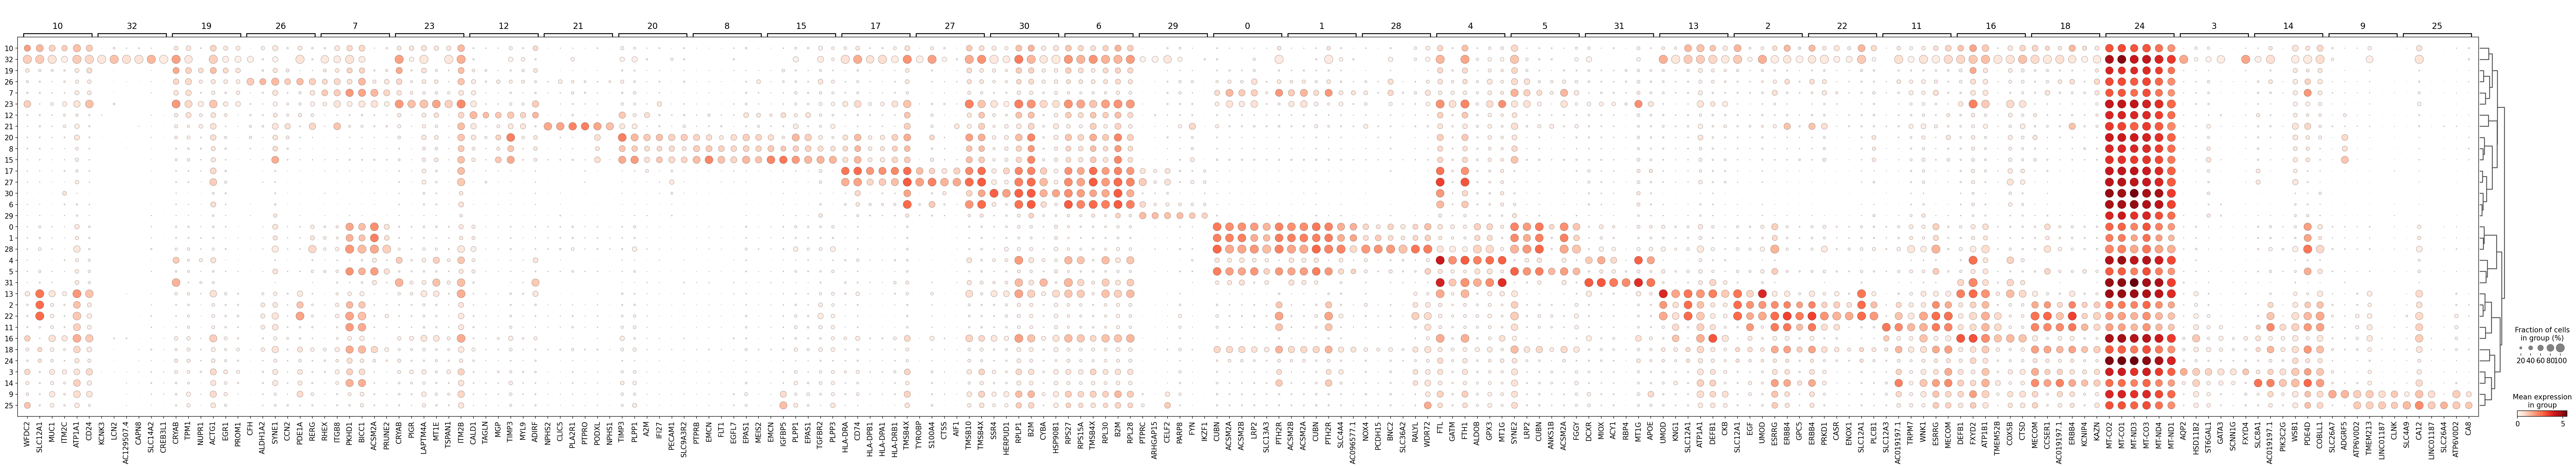

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata,n_genes=6)

In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names','scores','pvals','pvals_adj','logfoldchanges']}).to_csv('markers/Global_RNA_Integrated_leiden_on_multiVI.csv')

In [ ]:
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','scores','pvals','pvals_adj','logfoldchanges']})

0_n         0_s  0_p       0_l      1_n         1_s  1_p       1_l  \
0         CUBN  124.734924  0.0  4.333565   ACSM2B  116.020248  0.0  4.388056   
1       ACSM2A  119.374588  0.0  3.869153   ACSM2A  114.896500  0.0  4.237111   
2       ACSM2B  119.224831  0.0  3.899997     CUBN  105.656189  0.0  3.990879   
3         LRP2  116.682777  0.0  3.759700    PTH2R  102.469643  0.0  3.331045   
4      SLC13A3  112.173889  0.0  3.936009   SLC4A4   92.450134  0.0  3.517003   
...        ...         ...  ...       ...      ...         ...  ...       ...   
15571    RPS18  -65.408829  0.0 -3.249959    RPLP1  -66.211746  0.0 -3.168878   
15572    RPS28  -65.421417  0.0 -3.038833    RPL10  -66.697525  0.0 -3.634136   
15573    RPLP1  -66.340675  0.0 -2.915516    RPL41  -67.114952  0.0 -3.133142   
15574    RPL41  -67.259705  0.0 -2.892787   MT-ND3  -70.594444  0.0 -2.602233   
15575    RPL10  -68.819031  0.0 -3.433440  MT-ND4L  -71.352119  0.0 -2.706308   

           2_n         2_s  ...           30_p      30_l    31_n       31_s  \
0      SLC12A1  122.440910  ...  6.368012e-148  6.313114    DCXR  12.085938   
1          EGF  105.997261  ...  4.100578e-120  4.735794    MIOX  11.913776   
2         UMOD  101.010513  ...  7.565227e-108  3.209595    ACY1  11.746706   
3        ESRRG   86.804596  ...   5.111677e-95  3.414367    RBP4  11.558428   
4        ERBB4   85.108971  ...   3.079326e-91  3.961359    MT1G  11.376331   
...        ...         ...  ...            ...       ...     ...        ...   
15571    RPLP1  -51.469265  ...   2.258276e-35 -4.661056  ZBTB20  -6.758146   
15572      FTL  -51.704002  ...   4.301408e-38 -5.489557   DDX17  -7.010947   
15573   EEF1A1  -52.270035  ...   4.835934e-46 -5.554605   SYNE2  -7.279426   
15574     TPT1  -53.232468  ...   1.628481e-47 -3.990742   NEAT1  -8.601795   
15575   MT-CO1  -54.567863  ...   3.966608e-48 -6.542817  MALAT1 -10.408294   

               31_p       31_l        32_n      32_s      32_p       32_l  
0      1.952176e-29   6.598429       KCNK3  5.179901  0.000295   8.476573  
1      7.813540e-29   6.314337        LCN2  5.174876  0.000295   8.052597  
2      3.812277e-28   6.419891  AC129507.4  5.167420  0.000295   7.683949  
3      2.605982e-27   8.287873       CAPN8  5.165326  0.000295   7.525863  
4      1.708970e-26   5.944501     SLC14A2  5.163929  0.000295   7.406555  
...             ...        ...         ...       ...       ...        ...  
15571  3.023659e-09  -5.219984     TRABD2B -1.414414  0.675076 -28.250448  
15572  6.044262e-10  -5.615516       TRPM3 -1.439090  0.659805 -28.738522  
15573  9.324560e-11  -5.550186      COL4A2 -1.442300  0.657505 -27.927092  
15574  3.704189e-15 -31.071943      ACSM2B -1.502660  0.619159 -29.287937  
15575  2.722916e-22  -6.642849      ACSM2A -1.534858  0.595460 -29.362343  

[15576 rows x 132 columns]

In [ ]:
# Cluster 24 - MT Genes
# Cluster 18 - Potential doublets
# Cluster 19 - Medula like markers
# Cluster 23 - RPL Genes

In [ ]:
adata = adata[~adata.obs['leiden'].isin(['18','19','24','23'])].copy()

In [ ]:
adata.obs.to_csv('Multi_obs.csv')